In [93]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,f1_score
from imblearn.metrics import specificity_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
modelN1 = 'NBC'
modelN2 = 'LRC'
modelN3 = 'KNC'

In [94]:
SRV_datasheet = pd.read_excel("SRV.xlsx")
LR_Classifier = LogisticRegression()
NB_Classifier = MultinomialNB()
KN_CLassifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
X = SRV_datasheet.iloc[:,1:-1]
y = SRV_datasheet.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, train_size=0.8, shuffle=True)

STEP 1 : Determine Correlation

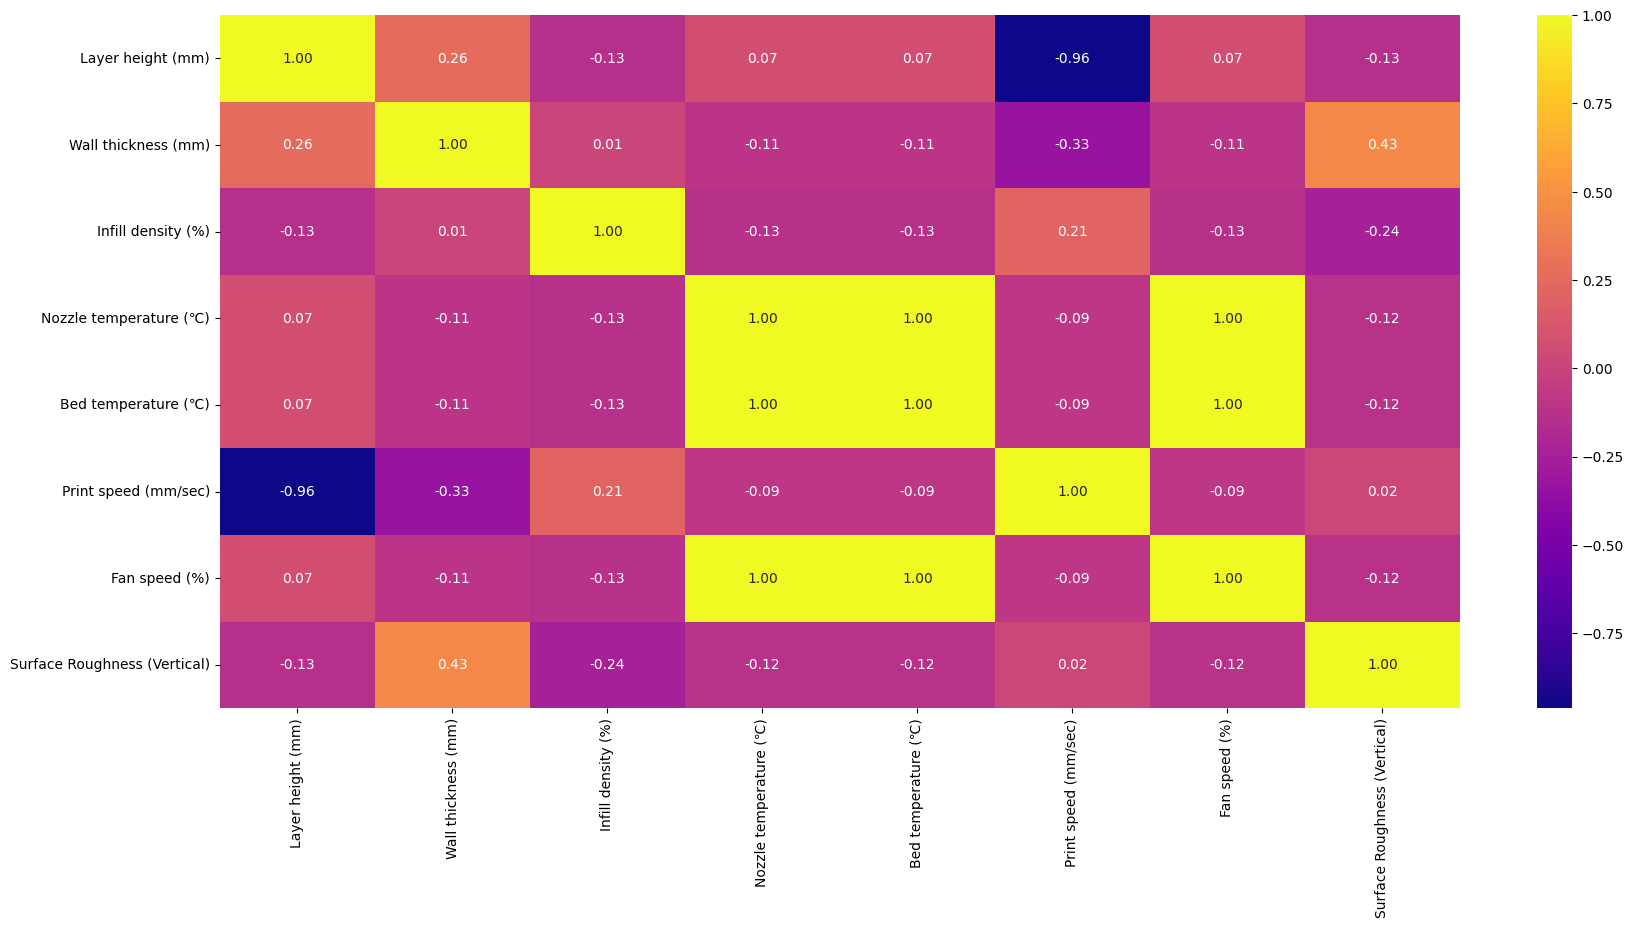

In [95]:
corr = X_train.corr()
plt.figure(figsize=(20,9))
hm = sns.heatmap(corr,cmap='plasma',annot=True,fmt='.2f')
plt.savefig('Correlation Heatmap.png',bbox_inches="tight")

Step 2 : Applying Classification And Getting Feature importance

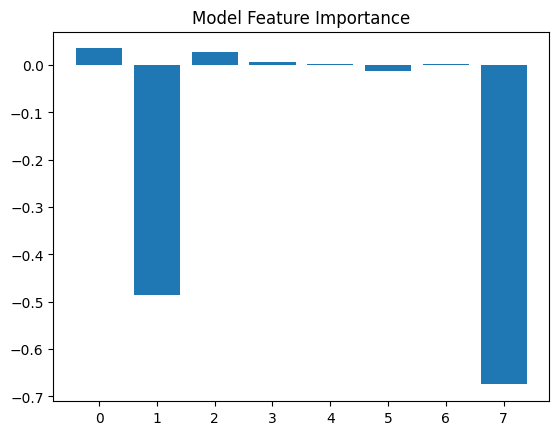

In [96]:
LR_Classifier.fit(X_train,y_train)
NB_Classifier.fit(X_train,y_train)
KN_CLassifier.fit(X_train,y_train)
LR_importance = LR_Classifier.coef_[0]

plt.title('Model Feature Importance')
plt.bar([x for x in range(len(LR_importance))], LR_importance)
plt.savefig('Feature Importance.png')

LR_y_pred_test = LR_Classifier.predict(X_test)
NB_y_pred_test = NB_Classifier.predict(X_test)
KN_y_pred_test = KN_CLassifier.predict(X_test)

In [97]:
print("Linear_Regression")
LR_CR = classification_report(y_test, LR_y_pred_test,output_dict=True,zero_division=1)
LR_CR_0 = LR_CR["0"]
LR_CR_1 = LR_CR["1"]
LR_f1_score = f1_score(y_test, LR_y_pred_test, average='binary')
LR_Specifivity_score = specificity_score(y_test, LR_y_pred_test)
LR_AUC_ROC = roc_auc_score(y_test, LR_y_pred_test)
print("Report Class A: ", LR_CR_0)
print("Report Class B: ", LR_CR_1)
print("Specificity: ", LR_Specifivity_score)
print("AOC_ROC: ", LR_AUC_ROC)


print("\nNaive_Bayes")
NB_CR = classification_report(y_test, NB_y_pred_test,output_dict=True,zero_division=1)
NB_CR_0 = NB_CR["0"]
NB_CR_1 = NB_CR["1"]
NB_f1_score = f1_score(y_test, NB_y_pred_test, average='binary')
NB_Specifivity_score = specificity_score(y_test, NB_y_pred_test)
NB_AUC_ROC = roc_auc_score(y_test, NB_y_pred_test)
print("Report Class A: ", NB_CR_0)
print("Report Class B: ", NB_CR_1)
print("Specificity: ", NB_Specifivity_score)
print("AOC_ROC: ", NB_AUC_ROC)


print("\nK_Nearest_Neighbours")
KN_CR = classification_report(y_test, KN_y_pred_test,output_dict=True,zero_division=1)
KN_CR_0 = KN_CR["0"]
KN_CR_1 = KN_CR["1"]
KN_f1_score = f1_score(y_test, KN_y_pred_test, average='binary')
KN_Specifivity_score = specificity_score(y_test, KN_y_pred_test)
KN_AUC_ROC = roc_auc_score(y_test, KN_y_pred_test)
print("Report Class A: ", KN_CR_0)
print("Report Class B: ", KN_CR_1)
print("Specificity: ", KN_Specifivity_score)
print("AOC_ROC: ", KN_AUC_ROC)

Linear_Regression
Report Class A:  {'precision': 0.5, 'recall': 0.6666666666666666, 'f1-score': 0.5714285714285715, 'support': 3}
Report Class B:  {'precision': 0.5, 'recall': 0.3333333333333333, 'f1-score': 0.4, 'support': 3}
Specificity:  0.6666666666666666
AOC_ROC:  0.5

Naive_Bayes
Report Class A:  {'precision': 1.0, 'recall': 0.3333333333333333, 'f1-score': 0.5, 'support': 3}
Report Class B:  {'precision': 0.6, 'recall': 1.0, 'f1-score': 0.7499999999999999, 'support': 3}
Specificity:  0.3333333333333333
AOC_ROC:  0.6666666666666667

K_Nearest_Neighbours
Report Class A:  {'precision': 0.6666666666666666, 'recall': 0.6666666666666666, 'f1-score': 0.6666666666666666, 'support': 3}
Report Class B:  {'precision': 0.6666666666666666, 'recall': 0.6666666666666666, 'f1-score': 0.6666666666666666, 'support': 3}
Specificity:  0.6666666666666666
AOC_ROC:  0.6666666666666667


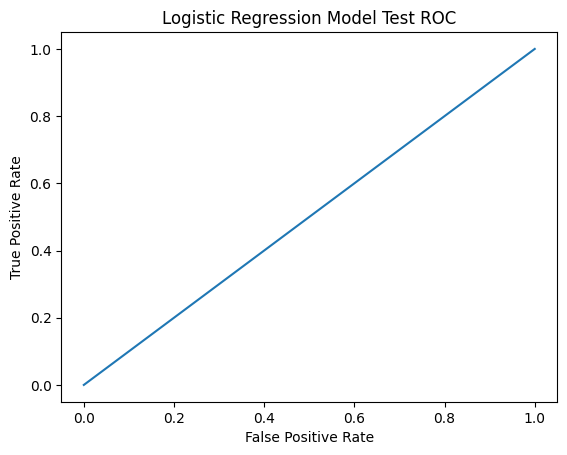

In [98]:
fpr, tpr, _ = roc_curve(y_test,  LR_y_pred_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression Model Test ROC')
plt.savefig('Logistic Regression Test ROC.png')

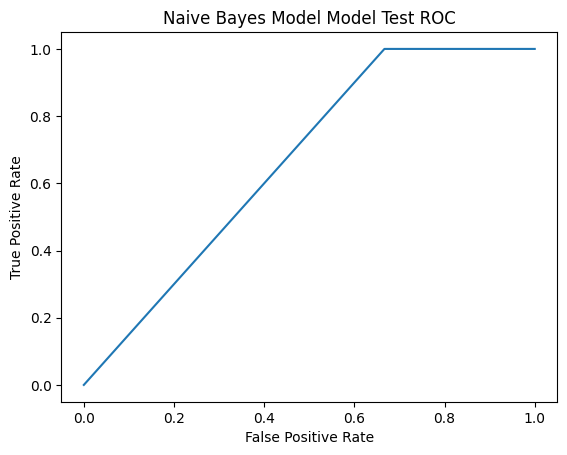

In [99]:
fpr, tpr, _ = roc_curve(y_test,  NB_y_pred_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Naive Bayes Model Model Test ROC')
plt.savefig('Naive Bayes Test ROC.png')

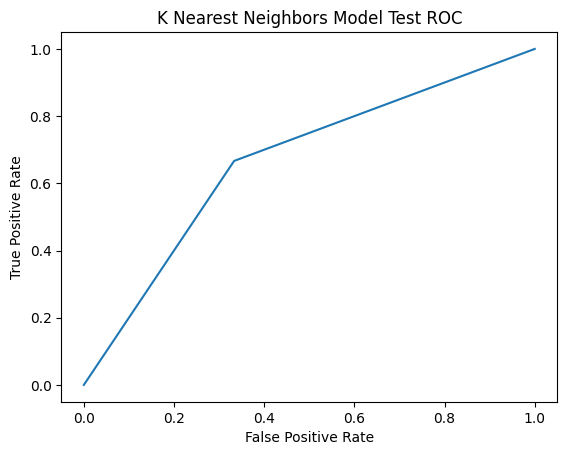

In [100]:
fpr, tpr, _ = roc_curve(y_test,  KN_y_pred_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('K Nearest Neighbors Model Test ROC')
plt.savefig('K Nearest Neighbors Test ROC.png')

In [101]:
X_test['Linear_Regression'] = LR_y_pred_test
X_test['Naive_Bayes'] = NB_y_pred_test
X_test['K_Nearest_Neighbours'] = KN_y_pred_test
X_test.to_csv(path_or_buf="Test Dataset.csv")

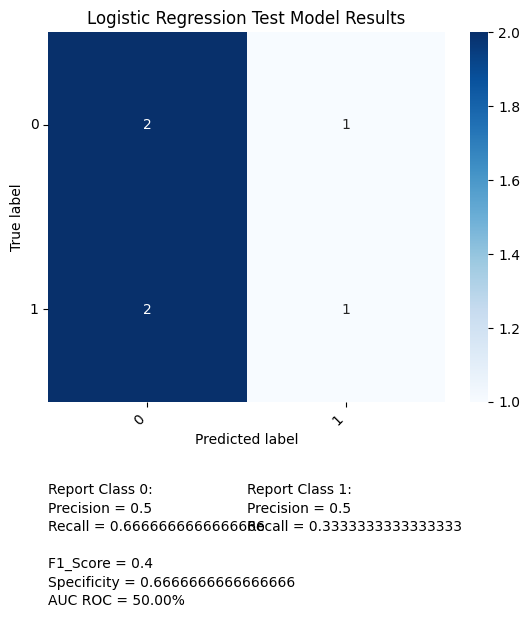

In [102]:
conmat = confusion_matrix(y_test, LR_y_pred_test)
val = np.mat(conmat)

classnames = list(set(y_test))

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)

plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.text(0, 2.5, "Report Class 0: ", fontsize=10,horizontalalignment ='left')
plt.text(0, 2.6, "Precision = "+str(format(LR_CR_0['precision'],'.2')), fontsize=10,horizontalalignment ='left')
plt.text(0, 2.7, "Recall = "+str(LR_CR_0['recall']), fontsize=10,horizontalalignment ='left')

plt.text(1, 2.5, "Report Class 1: ", fontsize=10,horizontalalignment ='left')
plt.text(1, 2.6, "Precision = "+str(format(LR_CR_1['precision'],'.2')), fontsize=10,horizontalalignment ='left')
plt.text(1, 2.7, "Recall = "+str(LR_CR_1['recall']), fontsize=10,horizontalalignment ='left')

plt.text(0, 2.9, "F1_Score = "+str(format(LR_f1_score,'.2')), fontsize=10,horizontalalignment ='left')
plt.text(0, 3, "Specificity = " + str(LR_Specifivity_score), fontsize=10)
plt.text(0, 3.1, "AUC ROC = " + str(format(LR_AUC_ROC,'.2%')), fontsize=10)

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('Logistic Regression Test Model Results')

plt.savefig('Logistic Regression Test.png',bbox_inches="tight")


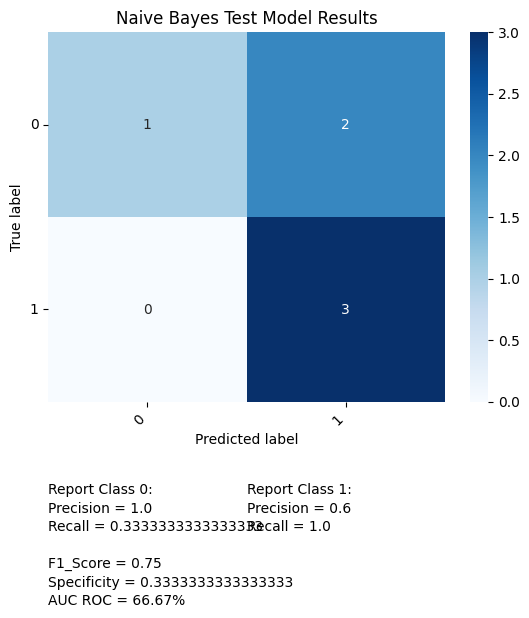

In [103]:
conmat = confusion_matrix(y_test, NB_y_pred_test)
val = np.mat(conmat)

classnames = list(set(y_test))

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)

plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.text(0, 2.5, "Report Class 0: ", fontsize=10,horizontalalignment ='left')
plt.text(0, 2.6, "Precision = "+str(format(NB_CR_0['precision'],'.2')), fontsize=10,horizontalalignment ='left')
plt.text(0, 2.7, "Recall = "+str(NB_CR_0['recall']), fontsize=10,horizontalalignment ='left')

plt.text(1, 2.5, "Report Class 1: ", fontsize=10,horizontalalignment ='left')
plt.text(1, 2.6, "Precision = "+str(format(NB_CR_1['precision'],'.2')), fontsize=10,horizontalalignment ='left')
plt.text(1, 2.7, "Recall = "+str(NB_CR_1['recall']), fontsize=10,horizontalalignment ='left')

plt.text(0, 2.9, "F1_Score = "+str(format(NB_f1_score,'.2')), fontsize=10,horizontalalignment ='left')
plt.text(0, 3, "Specificity = " + str(NB_Specifivity_score), fontsize=10)
plt.text(0, 3.1, "AUC ROC = " + str(format(NB_AUC_ROC,'.2%')), fontsize=10)


plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('Naive Bayes Test Model Results')

plt.savefig('Naive Bayes Test.png',bbox_inches="tight")

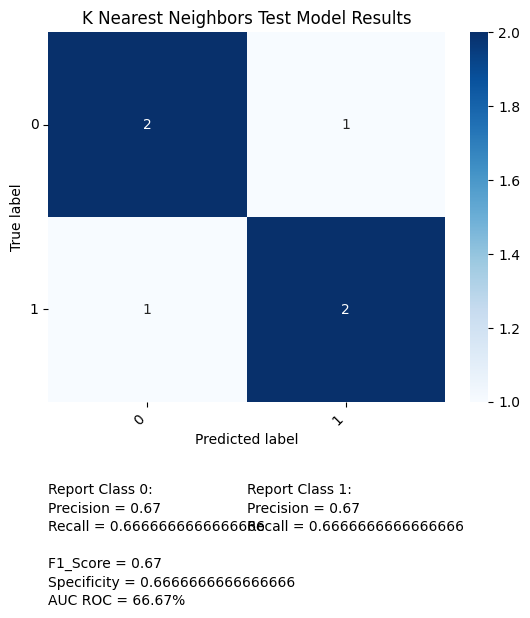

In [104]:
conmat = confusion_matrix(y_test, KN_y_pred_test)
val = np.mat(conmat)

classnames = list(set(y_test))

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)

plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.text(0, 2.5, "Report Class 0: ", fontsize=10,horizontalalignment ='left')
plt.text(0, 2.6, "Precision = "+str(format(KN_CR_0['precision'],'.2')), fontsize=10,horizontalalignment ='left')
plt.text(0, 2.7, "Recall = "+str(KN_CR_0['recall']), fontsize=10,horizontalalignment ='left')

plt.text(1, 2.5, "Report Class 1: ", fontsize=10,horizontalalignment ='left')
plt.text(1, 2.6, "Precision = "+str(format(KN_CR_1['precision'],'.2')), fontsize=10,horizontalalignment ='left')
plt.text(1, 2.7, "Recall = "+str(KN_CR_1['recall']), fontsize=10,horizontalalignment ='left')

plt.text(0, 2.9, "F1_Score = "+str(format(KN_f1_score,'.2')), fontsize=10,horizontalalignment ='left')
plt.text(0, 3, "Specificity = " + str(KN_Specifivity_score), fontsize=10)
plt.text(0, 3.1, "AUC ROC = " + str(format(KN_AUC_ROC,'.2%')), fontsize=10)

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('K Nearest Neighbors Test Model Results')

plt.savefig('K Nearest Neighbors Test.png',bbox_inches="tight")

In [105]:
LR_y_pred_train = LR_Classifier.predict(X_train)
NB_y_pred_train = NB_Classifier.predict(X_train)
KN_y_pred_train = KN_CLassifier.predict(X_train)

In [106]:
print("Linear_Regression")
LR_CR = classification_report(y_train, LR_y_pred_train,output_dict=True,zero_division=1)
LR_CR_0 = LR_CR["0"]
LR_CR_1 = LR_CR["1"]
LR_f1_score = f1_score(y_train, LR_y_pred_train, average='binary')
LR_Specifivity_score = specificity_score(y_train, LR_y_pred_train)
LR_AUC_ROC = roc_auc_score(y_train, LR_y_pred_train)
print("Report Class A: ", LR_CR_0)
print("Report Class B: ", LR_CR_1)
print("Specificity: ", LR_Specifivity_score)
print("AOC_ROC: ", LR_AUC_ROC)

print("\nNaive_Bayes")
NB_CR = classification_report(y_train, NB_y_pred_train,output_dict=True,zero_division=1)
NB_CR_0 = NB_CR["0"]
NB_CR_1 = NB_CR["1"]
NB_f1_score = f1_score(y_train, NB_y_pred_train, average='binary')
NB_Specifivity_score = specificity_score(y_train, NB_y_pred_train)
NB_AUC_ROC = roc_auc_score(y_train, NB_y_pred_train)
print("Report Class A: ", NB_CR_0)
print("Report Class B: ", NB_CR_1)
print("Specificity: ", NB_Specifivity_score)
print("AOC_ROC: ", NB_AUC_ROC)

print("\nK_Nearest_Neighbours")
KN_CR = classification_report(y_train, KN_y_pred_train,output_dict=True,zero_division=1)
KN_CR_0 = KN_CR["0"]
KN_CR_1 = KN_CR["1"]
KN_f1_score = f1_score(y_train, KN_y_pred_train, average='binary')
KN_Specifivity_score = specificity_score(y_train, KN_y_pred_train)
KN_AUC_ROC = roc_auc_score(y_train, KN_y_pred_train)
print("Report Class A: ", KN_CR_0)
print("Report Class B: ", KN_CR_1)
print("Specificity: ", KN_Specifivity_score)
print("AOC_ROC: ", KN_AUC_ROC)

Linear_Regression
Report Class A:  {'precision': 0.7272727272727273, 'recall': 0.6666666666666666, 'f1-score': 0.6956521739130435, 'support': 12}
Report Class B:  {'precision': 0.6923076923076923, 'recall': 0.75, 'f1-score': 0.7199999999999999, 'support': 12}
Specificity:  0.6666666666666666
AOC_ROC:  0.7083333333333334

Naive_Bayes
Report Class A:  {'precision': 0.5384615384615384, 'recall': 0.5833333333333334, 'f1-score': 0.5599999999999999, 'support': 12}
Report Class B:  {'precision': 0.5454545454545454, 'recall': 0.5, 'f1-score': 0.5217391304347826, 'support': 12}
Specificity:  0.5833333333333334
AOC_ROC:  0.5416666666666666

K_Nearest_Neighbours
Report Class A:  {'precision': 0.7777777777777778, 'recall': 0.5833333333333334, 'f1-score': 0.6666666666666666, 'support': 12}
Report Class B:  {'precision': 0.6666666666666666, 'recall': 0.8333333333333334, 'f1-score': 0.7407407407407408, 'support': 12}
Specificity:  0.5833333333333334
AOC_ROC:  0.7083333333333334


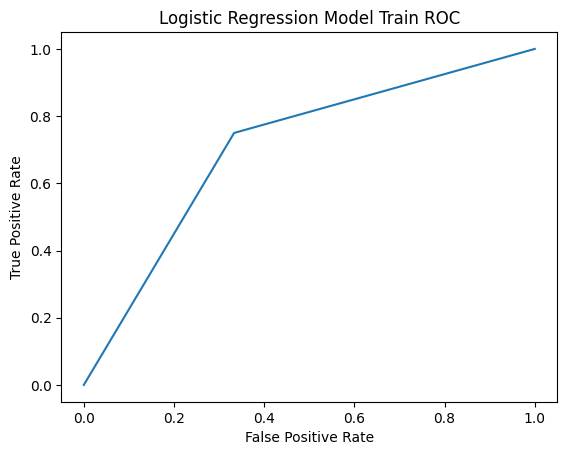

In [107]:
fpr, tpr, _ = roc_curve(y_train,  LR_y_pred_train)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression Model Train ROC')
plt.savefig('Logistic Regression Train ROC.png')

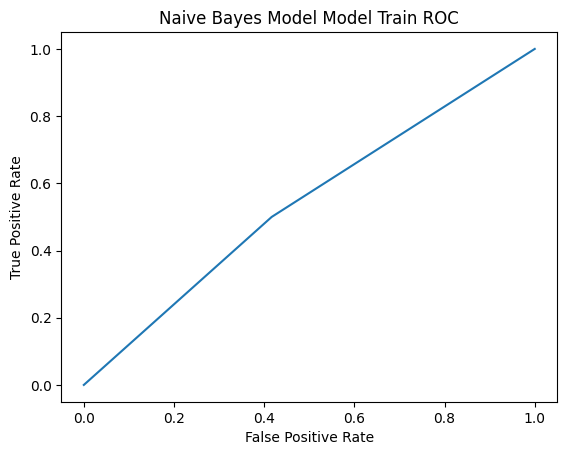

In [108]:
fpr, tpr, _ = roc_curve(y_train,  NB_y_pred_train)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Naive Bayes Model Model Train ROC')
plt.savefig('Naive Bayes Train ROC.png')

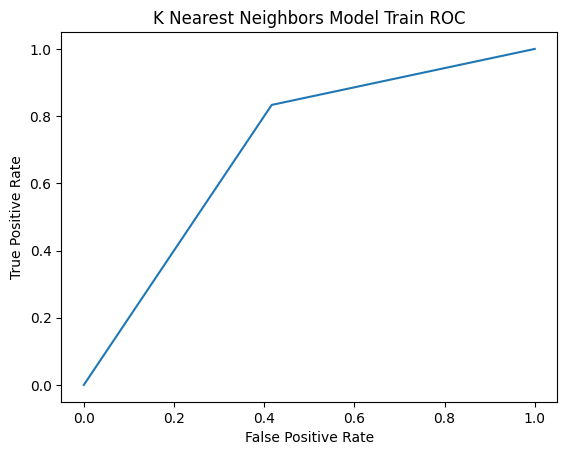

In [109]:
fpr, tpr, _ = roc_curve(y_train,  KN_y_pred_train)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('K Nearest Neighbors Model Train ROC')
plt.savefig('K Nearest Neighbors Train ROC.png')

In [110]:
X_train['Linear_Regression'] = LR_y_pred_train
X_train['Naive_Bayes'] = NB_y_pred_train
X_train['K_Nearest_Neighbours'] = KN_y_pred_train
X_train.to_csv(path_or_buf="Train Dataset.csv")

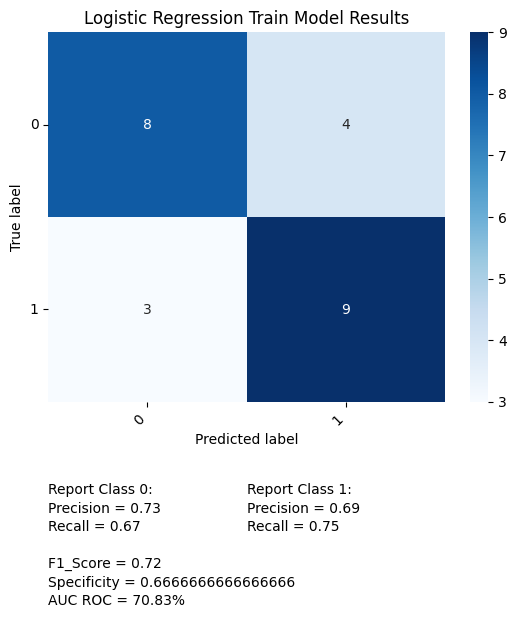

In [111]:
conmat = confusion_matrix(y_train, LR_y_pred_train)
val = np.mat(conmat)

classnames = list(set(y_train))

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)

plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.text(0, 2.5, "Report Class 0: ", fontsize=10,horizontalalignment ='left')
plt.text(0, 2.6, "Precision = "+str(format(LR_CR_0['precision'],'.2')), fontsize=10,horizontalalignment ='left')
plt.text(0, 2.7, "Recall = "+str(format(LR_CR_0['recall'],'.2')), fontsize=10,horizontalalignment ='left')

plt.text(1, 2.5, "Report Class 1: ", fontsize=10,horizontalalignment ='left')
plt.text(1, 2.6, "Precision = "+str(format(LR_CR_1['precision'],'.2')), fontsize=10,horizontalalignment ='left')
plt.text(1, 2.7, "Recall = "+str(format(LR_CR_1['recall'],'.2')), fontsize=10,horizontalalignment ='left')

plt.text(0, 2.9, "F1_Score = "+str(format(LR_f1_score,'.2')), fontsize=10,horizontalalignment ='left')
plt.text(0, 3, "Specificity = " + str(LR_Specifivity_score), fontsize=10)
plt.text(0, 3.1, "AUC ROC = " + str(format(LR_AUC_ROC,'.2%')), fontsize=10)

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('Logistic Regression Train Model Results')

plt.savefig('Logistic Regression Train.png',bbox_inches="tight")

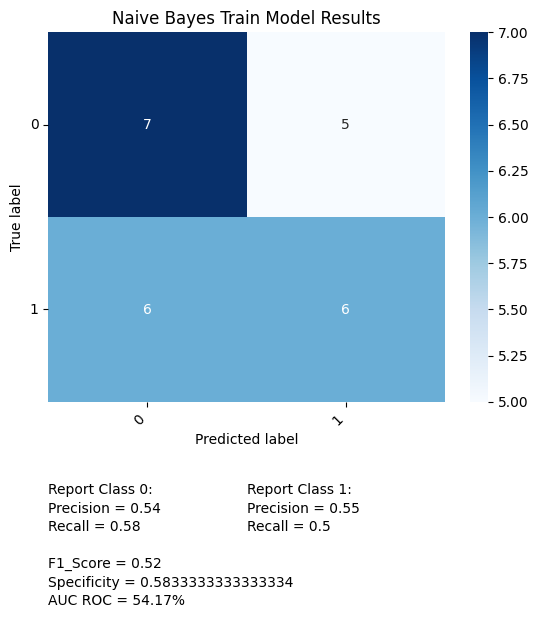

In [112]:
conmat = confusion_matrix(y_train, NB_y_pred_train)
val = np.mat(conmat)

classnames = list(set(y_train))

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)

plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.text(0, 2.5, "Report Class 0: ", fontsize=10,horizontalalignment ='left')
plt.text(0, 2.6, "Precision = "+str(format(NB_CR_0['precision'],'.2')), fontsize=10,horizontalalignment ='left')
plt.text(0, 2.7, "Recall = "+str(format(NB_CR_0['recall'],'.2')), fontsize=10,horizontalalignment ='left')

plt.text(1, 2.5, "Report Class 1: ", fontsize=10,horizontalalignment ='left')
plt.text(1, 2.6, "Precision = "+str(format(NB_CR_1['precision'],'.2')), fontsize=10,horizontalalignment ='left')
plt.text(1, 2.7, "Recall = "+str(format(NB_CR_1['recall'],'.2')), fontsize=10,horizontalalignment ='left')

plt.text(0, 2.9, "F1_Score = "+str(format(NB_f1_score,'.2')), fontsize=10,horizontalalignment ='left')
plt.text(0, 3, "Specificity = " + str(NB_Specifivity_score), fontsize=10)
plt.text(0, 3.1, "AUC ROC = " + str(format(NB_AUC_ROC,'.2%')), fontsize=10)

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('Naive Bayes Train Model Results')

plt.savefig('Naive Bayes Train.png',bbox_inches="tight")

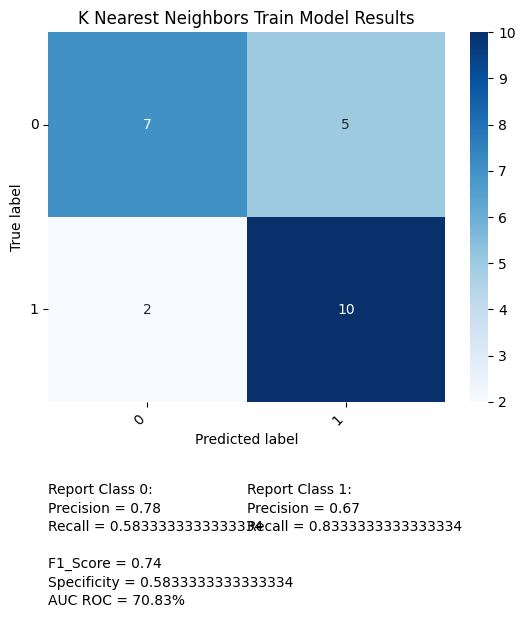

In [113]:
conmat = confusion_matrix(y_train, KN_y_pred_train)
val = np.mat(conmat)

classnames = list(set(y_train))

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)

plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.text(0, 2.5, "Report Class 0: ", fontsize=10,horizontalalignment ='left')
plt.text(0, 2.6, "Precision = "+str(format(KN_CR_0['precision'],'.2')), fontsize=10,horizontalalignment ='left')
plt.text(0, 2.7, "Recall = "+str(KN_CR_0['recall']), fontsize=10,horizontalalignment ='left')

plt.text(1, 2.5, "Report Class 1: ", fontsize=10,horizontalalignment ='left')
plt.text(1, 2.6, "Precision = "+str(format(KN_CR_1['precision'],'.2')), fontsize=10,horizontalalignment ='left')
plt.text(1, 2.7, "Recall = "+str(KN_CR_1['recall']), fontsize=10,horizontalalignment ='left')

plt.text(0, 2.9, "F1_Score = "+str(format(KN_f1_score,'.2')), fontsize=10,horizontalalignment ='left')
plt.text(0, 3, "Specificity = " + str(KN_Specifivity_score), fontsize=10)
plt.text(0, 3.1, "AUC ROC = " + str(format(KN_AUC_ROC,'.2%')), fontsize=10)

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('K Nearest Neighbors Train Model Results')

plt.savefig('K Nearest Neighbors Train.png',bbox_inches="tight")